In [22]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [23]:
df = pd.read_csv('../Data/1.olist_dataset.csv')
df = df.drop_duplicates(subset=['order_id'])
df = df.drop_duplicates(subset=['customer_unique_id'])
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119137,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,

In [24]:
df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [25]:
#delivered = livré = 7
#invoiced = facturé = 4
#shipped = expédié = 6
#processing = traitement = 5
#unavailable = indisponible = 0
#canceled = annulé = 1
#created = créé = 2
#approved = approuvé = 3

In [26]:
df['order_status'] = df['order_status'].replace('delivered', 7)
df['order_status'] = df['order_status'].replace('shipped', 6)
df['order_status'] = df['order_status'].replace('processing', 5)
df['order_status'] = df['order_status'].replace('invoiced', 4)
df['order_status'] = df['order_status'].replace('approved', 3)
df['order_status'] = df['order_status'].replace('created', 2)
df['order_status'] = df['order_status'].replace('canceled', 1)
df['order_status'] = df['order_status'].replace('unavailable', 0)

In [27]:
df['order_status'].unique()

array([7, 4, 6, 5, 0, 1, 2, 3])

In [42]:
data_type = df.dtypes
object_type = data_type == 'object'
colonnes_object = df.loc[:, object_type]
colonnes_object.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_type', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_id', 'seller_id',
       'shipping_limit_date', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_city', 'customer_state',
       'product_category_name_english'],
      dtype='object')

In [50]:
#payment_type
#review_score
#product_category_name_english

In [51]:
df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined',
       '0'], dtype=object)

In [52]:
df['payment_type'] = df['payment_type'].replace('credit_card', 5)
df['payment_type'] = df['payment_type'].replace('boleto', 4)
df['payment_type'] = df['payment_type'].replace('voucher', 3)
df['payment_type'] = df['payment_type'].replace('debit_card', 2)
df['payment_type'] = df['payment_type'].replace('not_defined', 1)
df['payment_type'] = df['payment_type'].replace('0', 0)

array([5, 4, 3, 2, 1, 0])

In [53]:
df['review_score'].unique()

array(['4.0', '5.0', '2.0', '1.0', 'no score', '3.0'], dtype=object)

In [55]:
index_noScore = df[df['review_score'] == 'no score'].index
df.drop(index_noScore, inplace=True)

In [58]:
df['review_score'] = df['review_score'].astype('float')

In [61]:
df['product_category_name_english'].nunique()

72

In [62]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['product_category_name_english'] = labelencoder.fit_transform(df['product_category_name_english'])

In [63]:
df['product_category_name_english'].dtypes

dtype('int64')

In [64]:
data_type = df.dtypes
object_type = data_type == 'object'
colonnes_object = df.loc[:, object_type]
colonnes_object.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'product_id',
       'seller_id', 'shipping_limit_date', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_city', 'customer_state'],
      dtype='object')

In [68]:
df.drop(columns=colonnes_object.columns, inplace=True)

In [69]:
df.dtypes

order_status                       int64
payment_sequential               float64
payment_type                       int64
payment_installments             float64
payment_value                    float64
review_score                     float64
order_item_id                    float64
price                            float64
freight_value                    float64
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
seller_zip_code_prefix           float64
geolocation_lat_x                float64
geolocation_lng_x                float64
customer_zip_code_prefix           int64
geolocation_lat_y                float64
geolocation_lng_y                float64
product_category_name_english      int64
dtype: object

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [71]:
import pandas as pd
from scipy.stats import shapiro

shapiro_results = []

for column in df.columns:
       if df[column].dtype in ['float64', 'int64']:
           stat, p_value = shapiro(df[column])
           shapiro_results.append([column, stat, p_value])

shapiro_df = pd.DataFrame(shapiro_results, columns=['Variable', 'Statistique', 'P-value'])
shapiro_df

,Variable,Statistique,P-value
0,order_status,0.121031,0.0
1,payment_sequential,0.063785,0.0
2,payment_type,0.547663,0.0
3,payment_installments,0.734591,0.0
4,payment_value,0.479292,0.0
5,review_score,0.688695,0.0
6,order_item_id,0.082799,0.0
7,price,0.471608,0.0
8,freight_value,0.594305,0.0
9,product_name_lenght,0.841253,0.0


In [72]:
df

,order_status,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,geolocation_lat_x,geolocation_lng_x,customer_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,product_category_name_english
0,7,1.0,5,1.0,18.12,4.0,1.0,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,-23.680114,-46.452454,3149,-23.574809,-46.587471,49
3,7,1.0,4,1.0,141.46,4.0,1.0,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,-19.810119,-43.984727,47813,-12.169860,-44.988369,60
4,7,1.0,5,3.0,179.12,5.0,1.0,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,-21.362358,-48.232976,75265,-16.746337,-48.514624,5
5,7,1.0,5,1.0,72.20,5.0,1.0,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,-19.840168,-43.923299,59296,-5.767733,-35.275467,61
6,7,1.0,5,1.0,28.62,5.0,1.0,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,-23.551707,-46.260979,9195,-23.675037,-46.524784,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119137,7,1.0,5,3.0,85.08,5.0,1.0,72.00,13.08,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0,12913.0,-22.957505,-46.524886,12209,-23.178732,-45.889711,43
119138,7,1.0,5,3.0,195.00,4.0,1.0,174.90,20.10,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,17602.0,-21.935321,-50.497562,11722,-24.001467,-46.446355,6
119139,7,1.0,5,5.0,271.01,5.0,1.0,205.99,65.02,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,8290.0,-23.551013,-46.448489,45920,-17.891522,-39.370942,45
119140,7,1.0,5,4.0,441.16,2.0,1.0,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175.0,-20.944706,-45.827098,28685,-22.555985,-42.690761,15


In [74]:
df = np.log1p(df)

In [86]:
df.isnull().sum()

order_status                         0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
review_score                         0
order_item_id                        0
price                                0
freight_value                        0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     0
product_length_cm                    0
product_height_cm                    0
product_width_cm                     0
seller_zip_code_prefix               0
geolocation_lat_x                94227
geolocation_lng_x                94227
customer_zip_code_prefix             0
geolocation_lat_y                95239
product_category_name_english        0
dtype: int64

In [88]:
df = df.drop(columns=['geolocation_lng_y'])
df = df.drop(columns=['geolocation_lat_x'])
df = df.drop(columns=['geolocation_lng_x'])
df = df.drop(columns=['geolocation_lat_y'])

In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [93]:
n_components = 19
pca = PCA(n_components=n_components)

In [94]:
pca.fit(X_scaled)

PCA(n_components=19)

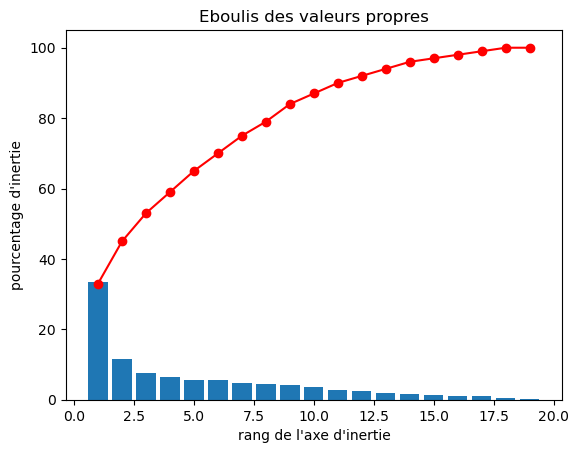

In [95]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)
list(x_list)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [96]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
features = df.columns
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
order_status,-0.324234,-0.245885,-0.064125,-0.095462,-0.093716,-0.151562,-0.033728,0.111896,0.137783,0.144699,-0.004672,0.094809,0.395163,-0.245587,0.043248,-0.035572,-0.100779,-0.304502,0.635895
payment_sequential,0.005632,-0.142306,0.453023,0.285237,0.127121,0.085096,0.348541,0.667013,-0.074158,-0.087784,-0.158639,-0.225005,0.042396,0.020042,-0.015304,0.016615,0.026974,-0.103050,-0.016800
payment_type,-0.027039,0.243217,-0.531621,-0.329632,-0.128629,-0.055539,-0.052090,0.315310,-0.176404,-0.158774,-0.357101,-0.490376,0.043110,0.007158,-0.018310,0.010600,0.004871,-0.019311,0.000903
payment_installments,-0.078025,0.418925,-0.287223,-0.049194,-0.018413,0.063511,0.248478,0.453441,-0.056716,0.010881,0.349335,0.571900,-0.071039,-0.026635,0.045735,-0.031568,-0.004376,0.021562,-0.002607
payment_value,-0.143018,0.518854,0.003889,0.212612,0.166144,0.061836,0.146599,-0.233401,0.234326,0.144976,-0.004116,-0.186497,0.098342,0.068749,-0.063813,0.098277,0.146466,-0.621278,-0.106915
review_score,-0.080289,-0.152579,-0.086686,-0.114854,0.065307,-0.513027,0.719699,-0.290360,-0.243691,-0.117888,0.024317,-0.018245,-0.062983,0.007372,-0.006342,0.017359,0.016454,-0.014679,-0.027812
order_item_id,-0.333132,-0.241435,-0.059422,-0.089629,-0.091701,-0.125087,-0.067835,0.119000,0.137681,0.135801,-0.003686,0.079569,0.339273,-0.210240,0.031806,-0.030652,-0.048577,-0.053565,-0.752410
price,-0.288063,0.308564,0.026304,0.164558,0.166715,-0.014036,0.168452,-0.068224,0.247777,0.185331,-0.065044,-0.175975,0.309021,0.005806,-0.012268,-0.000697,-0.036641,0.701626,0.113030
freight_value,-0.295376,0.143737,0.125376,0.156372,-0.281094,-0.064041,-0.038968,-0.026776,-0.023613,0.014694,-0.077126,-0.079301,-0.522558,-0.668828,-0.083524,-0.006804,0.147363,0.061754,0.024725
product_name_lenght,-0.266244,-0.263449,-0.262363,0.154835,0.048244,0.234415,0.021525,0.000124,0.087455,-0.280446,0.228768,-0.064108,-0.075742,0.066762,-0.375697,0.640133,-0.058976,0.036741,0.021831


<Axes: >

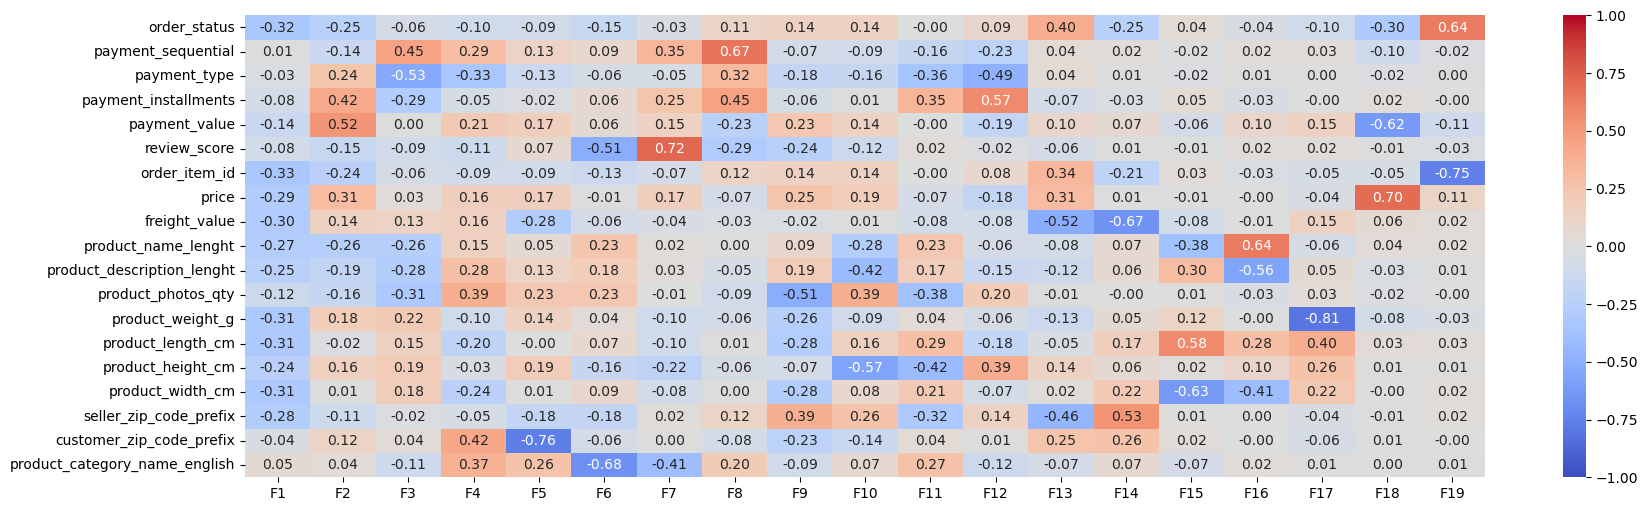

In [97]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")